In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


amazon_sales= 'Amazon Sale Report.csv' 

sales=pd.read_csv(amazon_sales)
#sales = sales.drop(columns=['Unnamed: 22'])
    
#Drop both 'fulfilled-by' and 'Unnamed: 22' 
sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])


# Function to display initial data overview
def data_overview(df, name):
    print(f"\nOverview of {name} dataset:")
    print(df.info())
    print(df.head())
    print(f"\nNumber of duplicates in {name}: {df.duplicated().sum()}")
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")
    
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)

# Replace NaN values in 'promotion-ids' with 'None'
sales['promotion-ids'] = sales['promotion-ids'].fillna('None')


sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Fulfilment'] = sales['Fulfilment'].astype('category')
sales.columns = sales.columns.str.strip()

# List of columns to convert to 'category' type
columns_to_convert = ['Fulfilment', 'Sales Channel', 'ship-service-level']

# Convert the columns to 'category' type
sales[columns_to_convert] = sales[columns_to_convert].astype('category')
     
    
# Display initial data overviews
#data_overview(sales, "sales")



/Users/juanescobar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


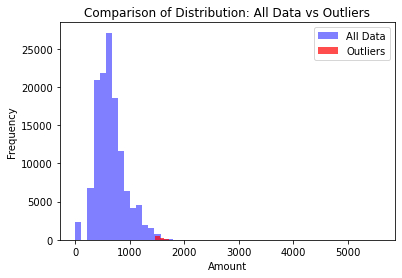

In [2]:
# Plot histogram of entire data
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')


from scipy.stats import zscore

sales['z_score'] = zscore(sales['Amount'])
outliers = sales[sales['z_score'].abs() > 3]
# Plot histogram of outliers
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7, label='Outliers')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Distribution: All Data vs Outliers')
plt.legend()
plt.show()

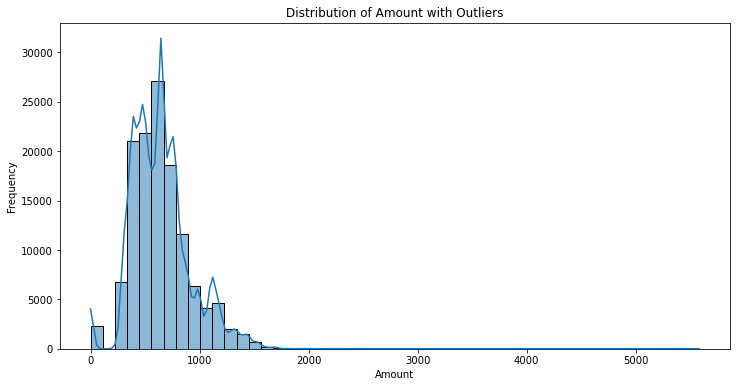

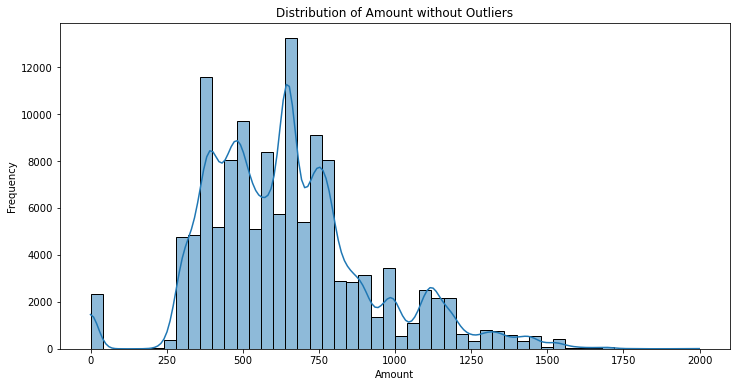

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution with outliers
plt.figure(figsize=(12, 6))
sns.histplot(sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount with Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Assuming outliers are those greater than 3000 (example threshold)
filtered_sales = sales[sales['Amount'] <= 2000]


# Plot distribution without outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

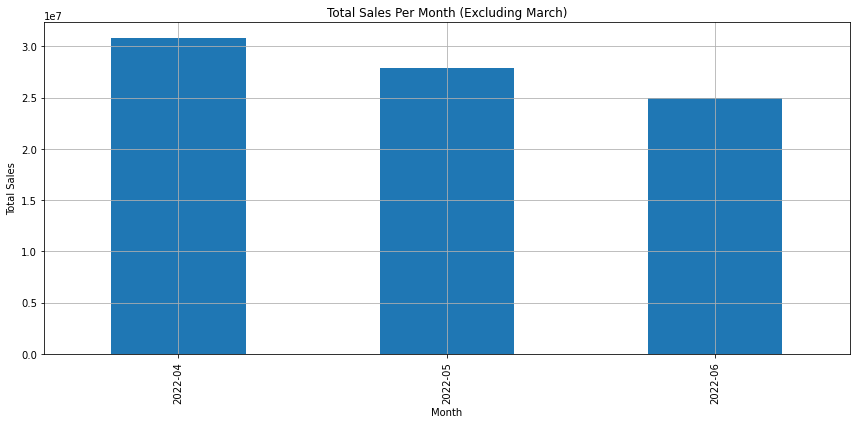

In [4]:
# Filter out sales data for March
sales_filtered = sales[~sales['Date'].dt.month.isin([3])]

# Group by month and sum the sales
monthly_sales_filtered = sales_filtered.groupby(sales_filtered['Date'].dt.to_period('M'))['Amount'].sum()

# Plot monthly sales excluding March
plt.figure(figsize=(12, 6))
monthly_sales_filtered.plot(kind='bar')
plt.title('Total Sales Per Month (Excluding March)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

7195
count           128975
unique            7195
top       JNE3797-KR-L
freq               773
Name: SKU, dtype: object


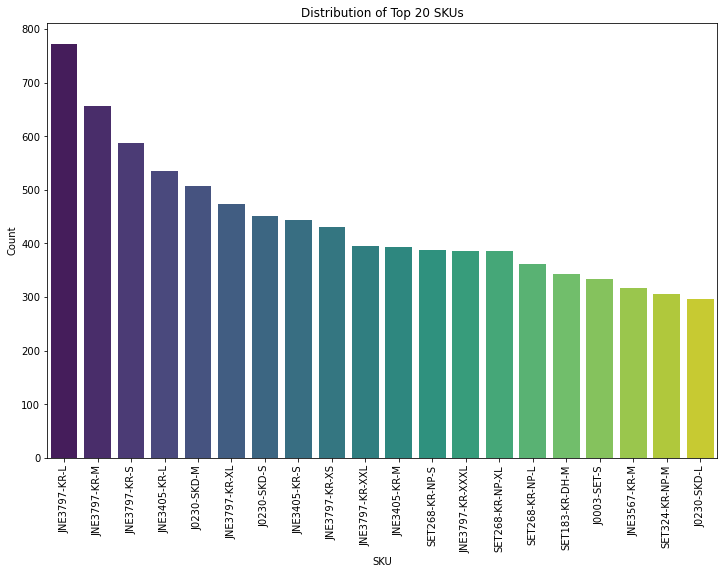

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each SKU
sku_counts = sales['SKU'].value_counts()

print(sales['SKU'].nunique())
print(sales['SKU'].describe())

# Filter for the top 20 SKUs if necessary
top_20_skus = sku_counts.head(20).reset_index()
top_20_skus.columns = ['SKU', 'Count']

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='SKU', y='Count', data=top_20_skus, palette='viridis')
plt.title('Distribution of Top 20 SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()


Unique simplified SKU count: 1496
count    1496.000000
mean       86.213235
std       196.377489
min         1.000000
25%         7.000000
50%        29.000000
75%        86.000000
max      3703.000000
Name: Simplified_SKU, dtype: float64
             SKU  Count
0     JNE3797-KR   3703
1     JNE3405-KR   2263
2      J0230-SKD   1868
3   SET268-KR-NP   1860
4       J0341-DR   1630
5      J0003-SET   1627
6   SET324-KR-NP   1284
7   SET345-KR-NP   1250
8     JNE3373-KR   1173
9     JNE3399-KR   1049
10  JNE3440-KR-N    995
11  SET331-KR-NP    966
12    JNE3567-KR    896
13    JNE3291-KR    865
14  SET291-KR-PP    855
15      J0339-DR    842
16    JNE3368-KR    841
17     J0008-SKD    831
18      J0119-TP    813
19    JNE3801-KR    798


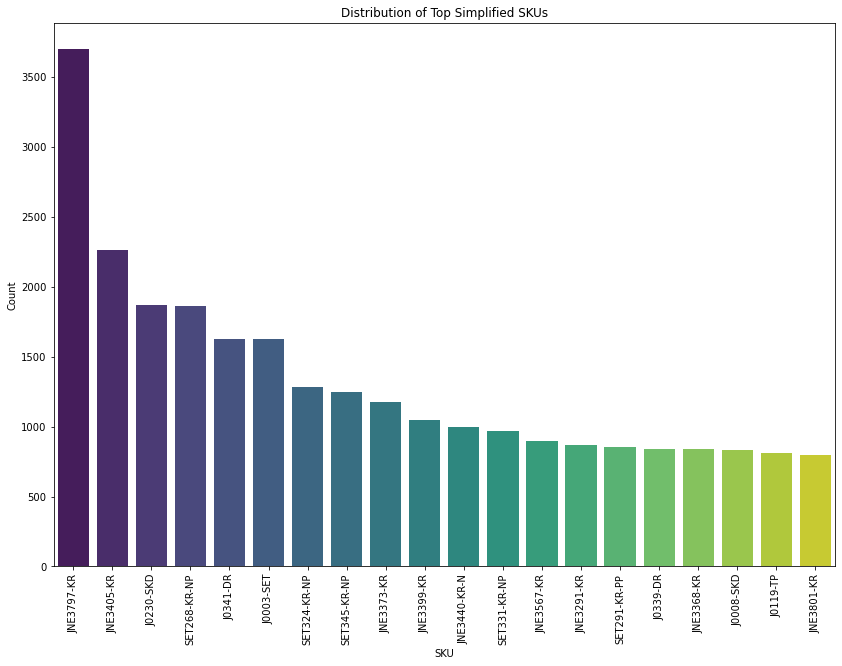

In [7]:
import pandas as pd

# Assuming you have the DataFrame 'sales'
# Example DataFrame creation for demonstration
# sales = pd.DataFrame({'SKU': [...]}) 

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Remove size suffixes from the SKU column
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Get the counts of each simplified SKU
simplified_sku_counts = sales['Simplified_SKU'].value_counts()

# Output the number of unique simplified SKUs
print("Unique simplified SKU count:", len(simplified_sku_counts))

# Describe the distribution of simplified SKUs
print(simplified_sku_counts.describe())

# Optionally, if you want to see the top simplified SKUs
top_simplified_skus = simplified_sku_counts.head(20).reset_index()
top_simplified_skus.columns = ['SKU', 'Count']


print(top_simplified_skus)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the simplified SKUs
plt.figure(figsize=(14, 10))
sns.barplot(x='SKU', y='Count', data=top_simplified_skus, palette='viridis')
plt.title('Distribution of Top Simplified SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()





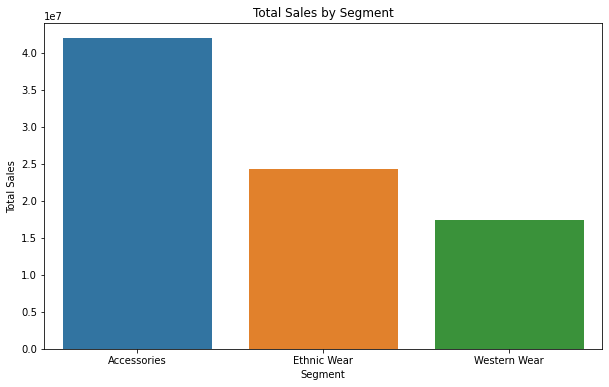

In [8]:
# Define broader categories
category_mapping = {
    'Set': 'Accessories',
    'kurta': 'Ethnic Wear',
    'Western Dress': 'Western Wear',
    'Top': 'Western Wear',
    'Ethnic Dress': 'Ethnic Wear',
    'Bottom': 'Accessories',
    'Saree': 'Ethnic Wear',
    'Blouse': 'Accessories',
    'Dupatta': 'Ethnic Wear'
}

# Apply the mapping to create a new column for broader segments
sales['Segment'] = sales['Category'].map(category_mapping)

# Calculate total sales by segment
segment_sales = sales.groupby('Segment')['Amount'].sum()

# Plot the sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Total Sales by Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.show()


     Simplified_SKU  Total_Amount
911      JNE3797-KR  2.701407e+06
326       J0230-SKD  2.032504e+06
1356   SET268-KR-NP  1.386939e+06
397        J0341-DR  1.334991e+06
126       J0003-SET  1.070178e+06
596      JNE3405-KR  9.499436e+05
132       J0008-SKD  8.639207e+05
1426   SET345-KR-NP  7.869618e+05
1405   SET324-KR-NP  7.706846e+05
1367   SET278-KR-NP  7.496253e+05
395        J0339-DR  6.860079e+05
918      JNE3801-KR  5.803742e+05
916      JNE3800-KR  5.800950e+05
1412   SET331-KR-NP  5.792248e+05
358       J0285-SKD  5.569229e+05
913      JNE3798-KR  5.408215e+05
1282   SET183-KR-DH  5.274818e+05
1388  SET304-KR-DPT  5.022377e+05
1469   SET398-KR-PP  4.894544e+05
1379   SET291-KR-PP  4.878406e+05


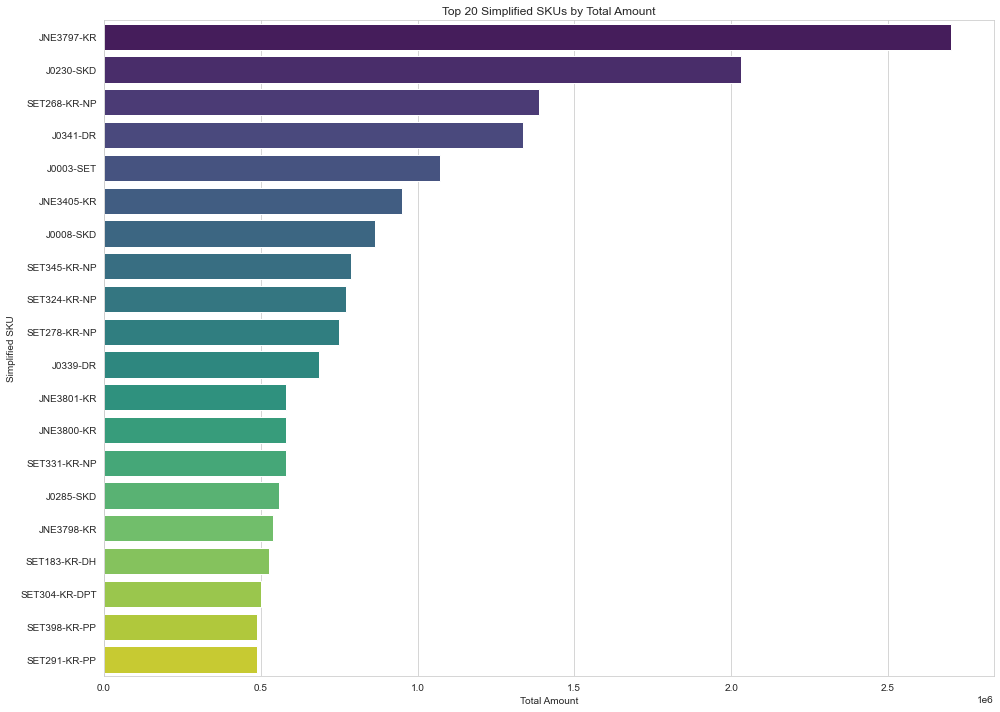

In [19]:
import pandas as pd

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# sales = pd.DataFrame({'SKU': [...], 'Amount': [...]})

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Function to remove size suffixes from SKUs
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

# Apply the function to create the 'Simplified_SKU' column
sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Group by 'Simplified_SKU' and calculate the total amount
sku_amounts = sales.groupby('Simplified_SKU')['Amount'].sum().reset_index(name='Total_Amount')

# Get the top 20 SKUs by total amount
top_20_skus = sku_amounts.nlargest(20, 'Total_Amount')

# Print the top 20 SKUs and their total amounts
print(top_20_skus)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# sales = pd.DataFrame({'SKU': [...], 'Amount': [...]})

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Function to remove size suffixes from SKUs
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

# Apply the function to create the 'Simplified_SKU' column
sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Group by 'Simplified_SKU' and calculate the total amount
sku_amounts = sales.groupby('Simplified_SKU')['Amount'].sum().reset_index(name='Total_Amount')

# Get the top 20 SKUs by total amount
top_20_skus = sku_amounts.nlargest(20, 'Total_Amount')

# Plot the top 20 SKUs by total amount
plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Amount', y='Simplified_SKU', data=top_20_skus, palette='viridis')

# Add titles and labels
plt.title('Top 20 Simplified SKUs by Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Simplified SKU')

# Show the plot
plt.tight_layout()
plt.show()



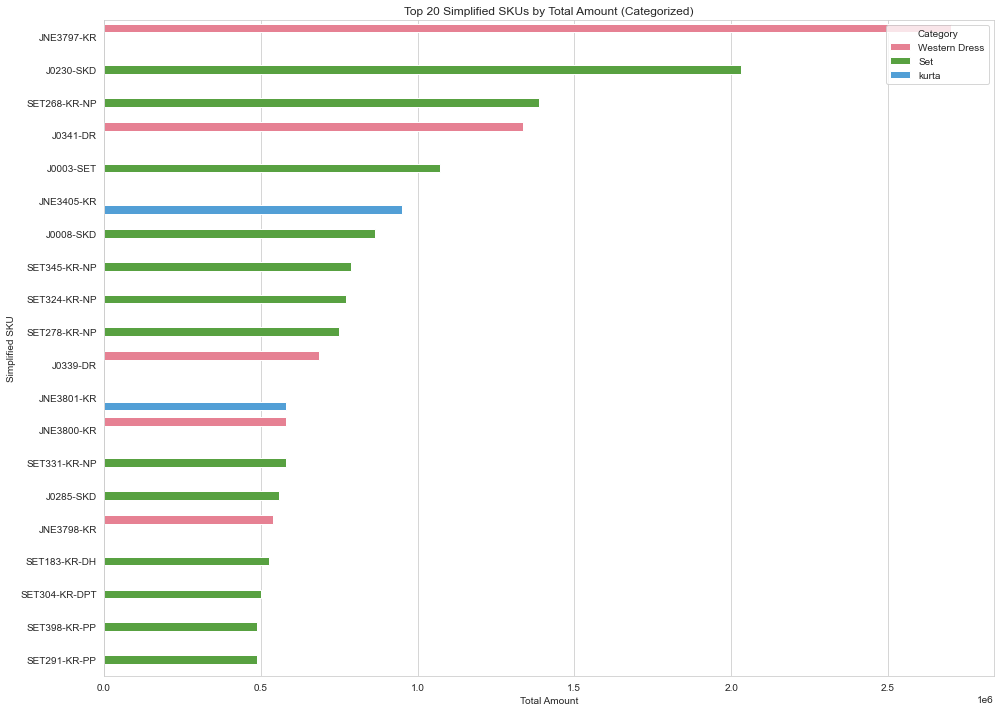

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# sales = pd.DataFrame({'SKU': [...], 'Category': [...], 'Amount': [...]})

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Function to remove size suffixes from SKUs
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

# Apply the function to create the 'Simplified_SKU' column
sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Group by 'Simplified_SKU' and calculate the total amount
sku_amounts = sales.groupby(['Simplified_SKU', 'Category'])['Amount'].sum().reset_index(name='Total_Amount')

# Get the top 20 SKUs by total amount
top_20_skus = sku_amounts.nlargest(20, 'Total_Amount')

# Create a color palette for the categories
palette = sns.color_palette("husl", len(top_20_skus['Category'].unique()))

# Plot the top 20 SKUs by total amount with colors representing categories
plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Amount', y='Simplified_SKU', hue='Category', data=top_20_skus, palette=palette)

# Add titles and labels
plt.title('Top 20 Simplified SKUs by Total Amount (Categorized)')
plt.xlabel('Total Amount')
plt.ylabel('Simplified SKU')
plt.legend(title='Category', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
